# Лабораторна робота №9 — Алгоритми на рядках

## Мета роботи:
Ознайомитися з базовими алгоритмами обробки рядків:
- Стиснення рядка
- Пошук підрядка
- Z-функція
- Наївний пошук шаблону

---

## 1. Стиснення рядка (RLE — Run-Length Encoding)

Стиснення однакових символів у вигляді символ + кількість повторень.  
Наприклад: `"aaabbc"` → `"a3b2c1"`


In [1]:
def compress_string(s):
    compressed = ''
    count = 1
    for i in range(1, len(s)):
        if s[i] == s[i-1]:
            count += 1
        else:
            compressed += s[i-1] + str(count)
            count = 1
    compressed += s[-1] + str(count)
    return compressed

# Приклад
s = "aaabbccccdaa"
print("Початковий рядок:", s)
print("Стиснутий рядок:", compress_string(s))


Початковий рядок: aaabbccccdaa
Стиснутий рядок: a3b2c4d1a2


## 2. Пошук підрядка в рядку (використання in / find)

Знайти, чи входить шаблон у рядок.

In [2]:
text = "Це приклад пошуку підрядка в довільному тексті"
pattern = "підрядка"

found_index = text.find(pattern)
if found_index != -1:
    print(f"Підрядок знайдено на позиції {found_index}")
else:
    print("Підрядок не знайдено")


Підрядок знайдено на позиції 18


## 3. Z-функція (Z-algorithm)

Z-функція показує, яка найбільша частина рядка співпадає з його префіксом.

Алгоритм працює за **O(n)** часу.


In [3]:
def z_function(s):
    n = len(s)
    z = [0] * n
    l, r = 0, 0
    for i in range(1, n):
        if i <= r:
            z[i] = min(r - i + 1, z[i - l])
        while i + z[i] < n and s[z[i]] == s[i + z[i]]:
            z[i] += 1
        if i + z[i] - 1 > r:
            l, r = i, i + z[i] - 1
    return z

# Приклад
s = "abacaba"
z = z_function(s)
print(f"Z-функція для рядка '{s}':\n", z)


Z-функція для рядка 'abacaba':
 [0, 0, 1, 0, 3, 0, 1]


## Візуалізація Z-функції

На графіку по осі X — індекс символа, по Y — значення Z[i].

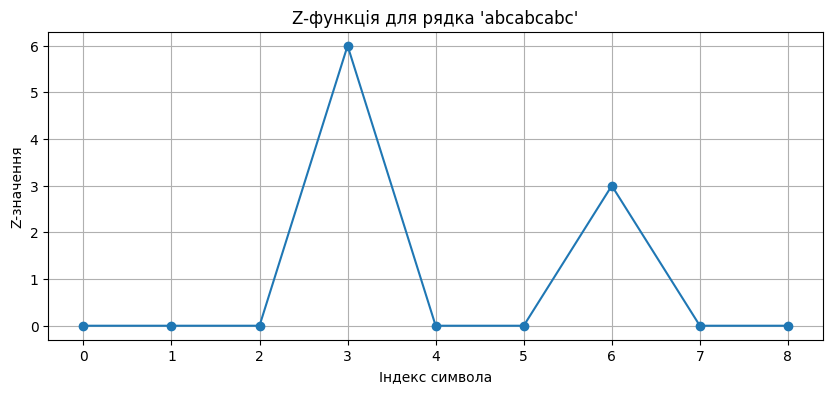

In [6]:
import matplotlib.pyplot as plt

s = "abcabcabc"
z = z_function(s)

plt.figure(figsize=(10, 4))
plt.plot(range(len(z)), z, marker='o')
plt.title("Z-функція для рядка 'abcabcabc'")
plt.xlabel("Індекс символа")
plt.ylabel("Z-значення")
plt.grid(True)
plt.show()


## 4. Наївний пошук шаблону в рядку

Алгоритм порівнює шаблон зі всіма можливими позиціями в тексті.

Асимптотика: **O(m·n)** у гіршому випадку  
де **m** — довжина тексту, **n** — довжина шаблону


In [4]:
def naive_string_match(text, pattern):
    positions = []
    for i in range(len(text) - len(pattern) + 1):
        match = True
        for j in range(len(pattern)):
            if text[i + j] != pattern[j]:
                match = False
                break
        if match:
            positions.append(i)
    return positions

# Приклад
text = "ababcabcabababd"
pattern = "abab"

found = naive_string_match(text, pattern)
print(f"Шаблон знайдено на позиціях: {found}")


Шаблон знайдено на позиціях: [0, 8, 10]


## 5. Пояснення: Асимптотика наївного пошуку

У найгіршому випадку кожну позицію тексту ми перевіряємо з нуля.

Асимптотика: **O(m·n)**  
– де m — довжина тексту  
– n — довжина шаблону

Наприклад:  


## 6. Асимптотика стискання за допомогою Z-функції

Z-функція обчислюється за **O(n)** — лінійний час, оскільки кожен символ розглядається максимум 2 рази.

Це робить її ефективною для стискання та пошуку шаблонів.


## 7. Порівняння алгоритмів на рядках за часом виконання
Нижче наведено графік, який показує порівняння трьох алгоритмів за часом виконання в залежності від довжини рядка:

- Стиснення рядка (RLE) — алгоритм стискає повторювані символи.
- Наївний пошук шаблону — перевіряє кожну позицію в тексті на відповідність шаблону.
- Z-функція — дозволяє швидко знаходити повтори та підрядки.

Алгоритми протестовано на випадкових рядках довжиною від 100 до 1000 символів.

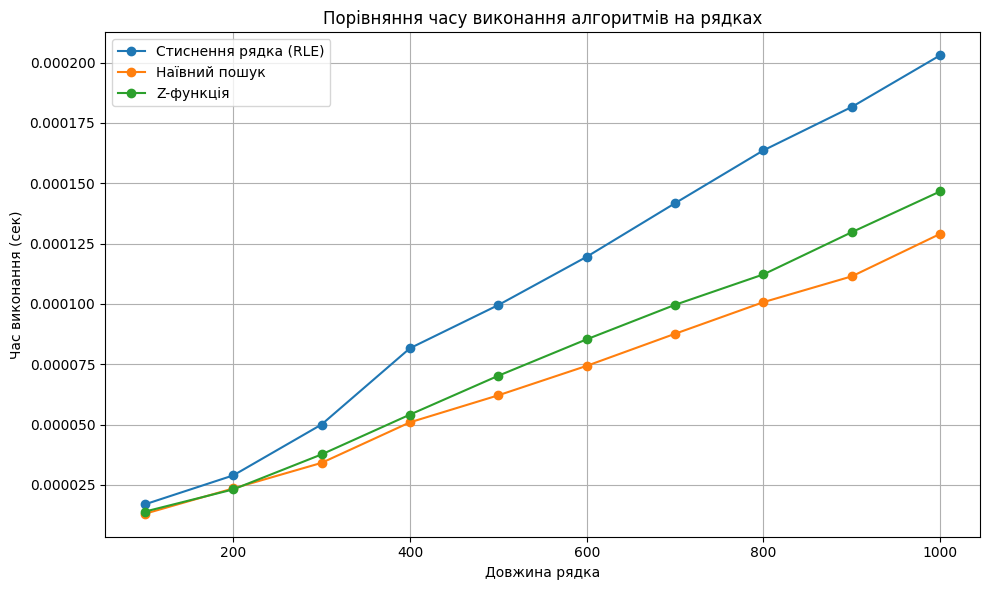

In [7]:
import matplotlib.pyplot as plt
import time
import random
import string

# Генератор випадкового рядка
def random_string(length):
    return ''.join(random.choices(string.ascii_lowercase, k=length))

# Стиснення рядка (RLE)
def compress_string(s):
    compressed = ""
    count = 1
    for i in range(1, len(s)):
        if s[i] == s[i-1]:
            count += 1
        else:
            compressed += s[i-1] + str(count)
            count = 1
    compressed += s[-1] + str(count)
    return compressed

# Наївний пошук шаблону
def naive_search(text, pattern):
    positions = []
    for i in range(len(text) - len(pattern) + 1):
        match = True
        for j in range(len(pattern)):
            if text[i+j] != pattern[j]:
                match = False
                break
        if match:
            positions.append(i)
    return positions

# Z-функція
def z_function(s):
    n = len(s)
    z = [0]*n
    l = r = 0
    for i in range(1, n):
        if i <= r:
            z[i] = min(r - i + 1, z[i - l])
        while i+z[i] < n and s[z[i]] == s[i + z[i]]:
            z[i] += 1
        if i + z[i] - 1 > r:
            l, r = i, i + z[i] - 1
    return z

# Порівняння часу виконання
sizes = list(range(100, 1100, 100))
compress_times = []
naive_times = []
zfunc_times = []

for size in sizes:
    s = random_string(size)
    pattern = s[:10]  # однаковий шаблон

    start = time.perf_counter()
    compress_string(s)
    compress_times.append(time.perf_counter() - start)

    start = time.perf_counter()
    naive_search(s, pattern)
    naive_times.append(time.perf_counter() - start)

    start = time.perf_counter()
    z_function(s)
    zfunc_times.append(time.perf_counter() - start)

# Побудова графіка
plt.figure(figsize=(10, 6))
plt.plot(sizes, compress_times, label="Стиснення рядка (RLE)", marker='o')
plt.plot(sizes, naive_times, label="Наївний пошук", marker='o')
plt.plot(sizes, zfunc_times, label="Z-функція", marker='o')
plt.xlabel("Довжина рядка")
plt.ylabel("Час виконання (сек)")
plt.title("Порівняння часу виконання алгоритмів на рядках")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Контрольні питання

### 1. Що таке префікс-функція і чим вона відрізняється від Z-функції?
- Префікс-функція показує довжину найбільшого префіксу, що є також суфіксом підрядка s[0:i].
- Z-функція показує, яка максимальна довжина префікса збігається з підрядком s[i:].

### 2. Що таке Z-функція та її роль?
- Z-функція використовується в пошуку шаблонів (наприклад, у алгоритмі Кнута-Морріса-Пратта).
- Дозволяє ефективно визначити повторення в рядку.

### 3. Підходи до задачі "найдовший спільний підрядок":
- Динамічне програмування (матриця порівняння символів)
- Суфіксні дерева / масиви
- Rolling hash (наприклад, Rabin-Karp)

### 4. Застосування в NLP:
- Пошук ключових слів
- Порівняння фраз (наприклад, в чат-ботах)
- Автодоповнення
- Виявлення плагіату
